# Домашнее задание к лекции "Базовые понятия статистики"

In [216]:
import pandas as pd
import numpy as np

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

## Дополнительная часть (необязательная)

Выполнить задания 1-3 для всего набора данных.

In [217]:
col_names = ['surgery', 'age', 'hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion', 'lesion type1', 'lesion type2', 'lesion type3', 'cp_data']

horses_df = pd.read_csv('data/horse_data.csv', header=None, names=col_names, na_values='?')
horses_df.head()

,surgery,age,hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,lesion type1,lesion type2,lesion type3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [218]:
# вывод базовых метрик
horses_df.describe()

,surgery,age,hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,lesion type1,lesion type2,lesion type3,cp_data
count,299.000000,300.000000,3.000000e+02,240.000000,276.000000,242.000000,244.000000,231.000000,253.000000,268.000000,...,271.000000,267.000000,135.000000,102.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.397993,1.640000,1.085889e+06,38.167917,71.913043,30.417355,2.348361,2.017316,2.853755,1.305970,...,46.295203,24.456929,2.037037,3.019608,1.551839,1.363333,3657.880000,90.226667,7.363333,1.670000
std,0.490305,2.173972,1.529801e+06,0.732289,28.630557,17.642231,1.045054,1.042428,1.620294,0.477629,...,10.419335,27.475009,0.804905,1.968567,0.737187,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,23.000000,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,18.500000,1.000000,1.000000,1.000000,1.000000,...,38.000000,6.500000,1.000000,2.000000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,2.000000,3.000000,1.000000,...,45.000000,7.500000,2.000000,2.250000,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,...,52.000000,57.000000,3.000000,3.900000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,75.000000,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000


In [219]:
horses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      299 non-null    float64
 1   age                          300 non-null    int64  
 2   hospital Number              300 non-null    int64  
 3   rectal temperature           240 non-null    float64
 4   pulse                        276 non-null    float64
 5   respiratory rate             242 non-null    float64
 6   temperature of extremities   244 non-null    float64
 7   peripheral pulse             231 non-null    float64
 8   mucous membranes             253 non-null    float64
 9   capillary refill time        268 non-null    float64
 10  pain                         245 non-null    float64
 11  peristalsis                  256 non-null    float64
 12  abdominal distension         244 non-null    float64
 13  nasogastric tube    

In [220]:
def show_nan_percentage(df):
    """
    показать процент пропусков по солбцам
    """
    print((df.isna().sum()*100/300).round().sort_values(ascending=False))

In [221]:
# посмотрим процент пропусков по солбцам
show_nan_percentage(horses_df)

nasogastric reflux PH          82.0
abdomcentesis total protein    66.0
abdominocentesis appearance    55.0
abdomen                        39.0
nasogastric reflux             35.0
nasogastric tube               35.0
rectal examination - feces     34.0
peripheral pulse               23.0
rectal temperature             20.0
temperature of extremities     19.0
respiratory rate               19.0
abdominal distension           19.0
pain                           18.0
mucous membranes               16.0
peristalsis                    15.0
total protein                  11.0
capillary refill time          11.0
packed cell volume             10.0
pulse                           8.0
hospital Number                 0.0
age                             0.0
cp_data                         0.0
lesion type3                    0.0
outcome                         0.0
surgical lesion                 0.0
lesion type1                    0.0
lesion type2                    0.0
surgery                     

In [222]:
# столбец 'nasogastric reflux PH' содержит 82% пропусков, информация в нем не несёт особой ценности, удалим его
horses_df.drop(['nasogastric reflux PH'], axis=1, inplace=True)

In [223]:
# удалим остальные нерелевантные столбцы с пропусками (судя по их описанию делаем предположение о нерелевантности)
cols_to_remove = ['abdomen', 'nasogastric reflux', 'nasogastric tube', 'rectal examination - feces', 'peripheral pulse', 'respiratory rate', 'temperature of extremities', 'mucous membranes', 'peristalsis', 'capillary refill time', 'total protein']
horses_df.drop(cols_to_remove, axis=1, inplace=True)

In [224]:
# 'abdomcentesis total protein' - тоже много пропусков, но содержит важную информацию: 
# чем выше протеин тем выше вероятность что у лошади проблемы с кишечником,  
# выберем вариант замена, медианой или средним значением (линейные, дискретные данные)

print(horses_df['abdomcentesis total protein'].describe())
print(horses_df['abdomcentesis total protein'].fillna(horses_df['abdomcentesis total protein'].mean()).describe())
print(horses_df['abdomcentesis total protein'].fillna(horses_df['abdomcentesis total protein'].median()).describe())

count    102.000000
mean       3.019608
std        1.968567
min        0.100000
25%        2.000000
50%        2.250000
75%        3.900000
max       10.100000
Name: abdomcentesis total protein, dtype: float64
count    300.000000
mean       3.019608
std        1.144130
min        0.100000
25%        3.019608
50%        3.019608
75%        3.019608
max       10.100000
Name: abdomcentesis total protein, dtype: float64
count    300.000000
mean       2.511667
std        1.200995
min        0.100000
25%        2.250000
50%        2.250000
75%        2.250000
max       10.100000
Name: abdomcentesis total protein, dtype: float64


In [225]:
# из вывода видно, что среднее искажает значения меньше, применим его 

horses_df['abdomcentesis total protein'].fillna(horses_df['abdomcentesis total protein'].mean(), inplace=True)
horses_df['abdomcentesis total protein'].fillna(horses_df['abdomcentesis total protein'].mean()).isna().sum() # остались ли пропуски

0

In [226]:
# посмотрим что по пропускам осталось
show_nan_percentage(horses_df)

abdominocentesis appearance    55.0
rectal temperature             20.0
abdominal distension           19.0
pain                           18.0
packed cell volume             10.0
pulse                           8.0
cp_data                         0.0
lesion type3                    0.0
lesion type2                    0.0
lesion type1                    0.0
surgical lesion                 0.0
outcome                         0.0
abdomcentesis total protein     0.0
hospital Number                 0.0
age                             0.0
surgery                         0.0
dtype: float64


In [227]:
# стобец 'abdominocentesis appearance' может иметь прямое отношение к желудочным коликам лошади
horses_df['abdominocentesis appearance'].value_counts() # посмотрим кол-во категорий

2.0    48
3.0    46
1.0    41
Name: abdominocentesis appearance, dtype: int64

In [228]:
# заполним его модой, (категориальный столбец)
horses_df['abdominocentesis appearance'].fillna(horses_df['abdominocentesis appearance'].mode()[0], inplace=True)

In [229]:
show_nan_percentage(horses_df)

rectal temperature             20.0
abdominal distension           19.0
pain                           18.0
packed cell volume             10.0
pulse                           8.0
cp_data                         0.0
lesion type3                    0.0
lesion type2                    0.0
lesion type1                    0.0
surgical lesion                 0.0
outcome                         0.0
abdomcentesis total protein     0.0
abdominocentesis appearance     0.0
hospital Number                 0.0
age                             0.0
surgery                         0.0
dtype: float64


In [230]:
# заполним остальные пропуски
horses_df['rectal temperature'].fillna(horses_df['rectal temperature'].median(), inplace=True) # температуру заполним медианой
horses_df['abdominal distension'].fillna(horses_df['abdominal distension'].mode()[0], inplace=True) # вздутие живота, важный категориальный параметр, заполним модой
horses_df['pain'].fillna(horses_df['pain'].mode()[0], inplace=True) # боль, категориальная величина, модой
horses_df['packed cell volume'].fillna(horses_df['packed cell volume'].median(), inplace=True) # кол-во эритроцитов, линейная величина, заполним медианой
horses_df['pulse'].fillna(horses_df['pulse'].median(), inplace=True) # пульс, линейная дискретная величина, заполним медианой



In [231]:
show_nan_percentage(horses_df)

cp_data                        0.0
lesion type3                   0.0
lesion type2                   0.0
lesion type1                   0.0
surgical lesion                0.0
outcome                        0.0
abdomcentesis total protein    0.0
abdominocentesis appearance    0.0
packed cell volume             0.0
abdominal distension           0.0
pain                           0.0
pulse                          0.0
rectal temperature             0.0
hospital Number                0.0
age                            0.0
surgery                        0.0
dtype: float64


In [232]:
# данные подготовлены, пропусков нет
# теперь посмотрим базовые метрики
horses_df.describe()

,surgery,age,hospital Number,rectal temperature,pulse,pain,abdominal distension,packed cell volume,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,lesion type1,lesion type2,lesion type3,cp_data
count,299.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.397993,1.640000,1.085889e+06,38.174333,71.280000,2.960000,2.030000,46.170000,2.016667,3.019608,1.551839,1.363333,3657.880000,90.226667,7.363333,1.670000
std,0.490305,2.173972,1.529801e+06,0.654831,27.541545,1.181689,1.079963,9.908584,0.539158,1.144130,0.737187,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,1.000000,1.000000,23.000000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.900000,48.000000,2.000000,1.000000,39.000000,2.000000,3.019608,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,3.000000,2.000000,45.000000,2.000000,3.019608,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,4.000000,3.000000,50.000000,2.000000,3.019608,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,5.000000,4.000000,75.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000


In [233]:
# посмотрим СКО по температуре - большой разброс значений
print(horses_df['rectal temperature'].std())
# посмотрим на выбросы превышающие нормальную температуру (нормальная 37.8), изменение средней, превышающей нормальную
print(horses_df['rectal temperature'].mean())
print(horses_df[(horses_df['rectal temperature'] > 37.8)]['rectal temperature'].mean())

0.6548312010703262
38.17433333333336
38.430396475770905


In [234]:
# медиана
print(horses_df['rectal temperature'].median())
print(horses_df[(horses_df['rectal temperature'] > 37.8)]['rectal temperature'].median())

38.2
38.2


In [235]:
# мода
print(horses_df['rectal temperature'].round().mode())
print(horses_df[(horses_df['rectal temperature'] > 37.8)]['rectal temperature'].round().mode())

0    38.0
dtype: float64
0    38.0
dtype: float64


In [236]:
horses_df


,surgery,age,hospital Number,rectal temperature,pulse,pain,abdominal distension,packed cell volume,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,lesion type1,lesion type2,lesion type3,cp_data
0,2.0,1,530101,38.5,66.0,5.0,4.0,45.0,2.0,3.019608,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,3.0,2.0,50.0,2.0,2.000000,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,3.0,1.0,33.0,2.0,3.019608,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,2.0,4.0,48.0,3.0,5.300000,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,3.0,1.0,74.0,2.0,3.019608,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,38.2,120.0,2.0,1.0,55.0,2.0,3.019608,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,4.0,3.0,44.0,3.0,3.300000,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,4.0,3.0,60.0,2.0,3.019608,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,3.0,3.0,50.0,3.0,3.400000,1.0,1,2208,0,0,1


In [237]:
def get_outliers(column_name):
    """
    получить выбросы через межквартильный размах
    """
    q1 = horses_df[column_name].quantile(0.25)
    q3 = horses_df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    remove_outliers = horses_df[horses_df[column_name].between(lower_bound, upper_bound, inclusive=True)]
    return remove_outliers


In [246]:
remove_age_outliers = get_outliers('age')
pd.concat([horses_df, remove_age_outliers]).drop_duplicates(keep=False)

# видим адекватные данные, лошади могут жить 25-30 лет, оставляем значения

,surgery,age,hospital Number,rectal temperature,pulse,pain,abdominal distension,packed cell volume,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,lesion type1,lesion type2,lesion type3,cp_data
3,1.0,9,5290409,39.1,164.0,2.0,4.0,48.0,3.0,5.300000,2.0,1,2208,0,0,1
9,2.0,9,5299629,38.3,90.0,5.0,1.0,40.0,1.0,2.200000,1.0,2,0,0,0,1
13,2.0,9,5291329,38.0,92.0,1.0,2.0,37.0,1.0,3.019608,2.0,2,0,0,0,1
16,1.0,9,5301219,38.2,128.0,4.0,3.0,53.0,3.0,4.700000,2.0,2,1400,0,0,1
23,1.0,9,534998,38.3,130.0,2.0,1.0,50.0,2.0,3.019608,1.0,1,3111,0,0,2
39,1.0,9,5277409,39.2,146.0,3.0,1.0,45.0,2.0,3.019608,2.0,1,2113,0,0,2
41,2.0,9,5288249,39.0,150.0,3.0,1.0,47.0,2.0,0.100000,1.0,1,9400,0,0,1
55,1.0,9,5282839,38.6,160.0,3.0,4.0,38.0,2.0,3.019608,2.0,1,7111,0,0,1
74,1.0,9,5292929,38.2,64.0,3.0,1.0,37.0,2.0,3.019608,2.0,1,11124,0,0,2
75,1.0,9,534092,39.7,100.0,2.0,1.0,48.0,2.0,2.000000,3.0,1,1400,0,0,2


In [245]:
# посмотрим на выбросы через межквартильный размах по возрасту лошаде
remove_rectal_t_outliers = get_outliers('rectal temperature')
pd.concat([horses_df, remove_rectal_t_outliers]).drop_duplicates(keep=False)

# видим адекватные данные температуры, оставляем значения

,surgery,age,hospital Number,rectal temperature,pulse,pain,abdominal distension,packed cell volume,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,lesion type1,lesion type2,lesion type3,cp_data
20,1.0,1,530157,39.9,72.0,5.0,4.0,46.0,2.0,3.019608,1.0,1,2111,0,0,2
44,1.0,1,535407,35.4,140.0,4.0,1.0,57.0,3.0,2.000000,3.0,1,3205,0,0,2
54,2.0,1,529461,40.3,114.0,2.0,3.0,57.0,3.0,4.500000,3.0,1,7400,0,0,1
75,1.0,9,534092,39.7,100.0,2.0,1.0,48.0,2.0,2.000000,3.0,1,1400,0,0,2
80,1.0,1,527518,36.4,98.0,4.0,2.0,47.0,3.0,3.600000,2.0,1,2205,0,0,1
91,2.0,1,529461,40.3,114.0,2.0,3.0,57.0,3.0,4.500000,2.0,1,3205,0,0,1
99,2.0,1,530002,39.6,108.0,2.0,3.0,59.0,2.0,2.600000,1.0,2,4300,0,0,1
113,1.0,1,527933,36.8,60.0,3.0,1.0,45.0,2.0,10.000000,2.0,1,3205,0,0,1
117,2.0,1,5290482,39.5,64.0,3.0,3.0,45.0,1.0,3.019608,3.0,1,4205,0,0,2
118,1.0,1,533983,36.5,78.0,5.0,1.0,34.0,2.0,1.000000,1.0,1,3112,6112,0,2


<AxesSubplot:title={'center':'User Score distribution'}>

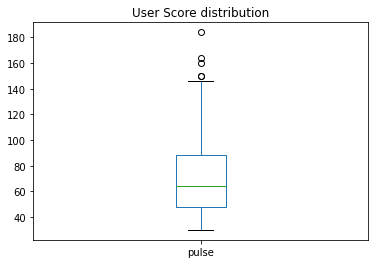

In [249]:
# посмотрим выборочно на выбросы с помощью box plot чарта
horses_df.pulse.plot(kind='box', title='User Score distribution') # пульс лошади может достигать до 180-240 уд/мин, оставляем 

75.0

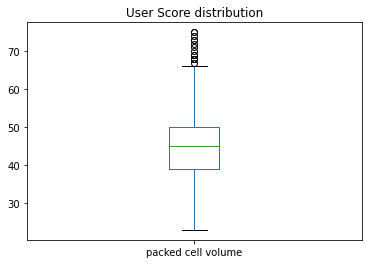

In [253]:
horses_df['packed cell volume'].plot(kind='box', title='User Score distribution') # max выброс - 75, это возможное значение, оставляем
horses_df['packed cell volume'].max()

<AxesSubplot:title={'center':'Correlation between Age and Pulse'}, xlabel='pulse', ylabel='age'>

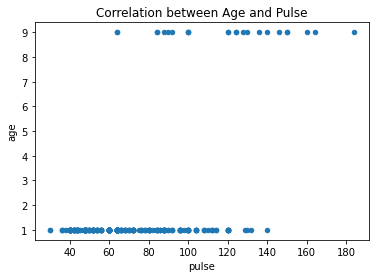

In [258]:
# посмотри корреляцию между возрастом и пульсом
horses_df.plot(kind='scatter', 
        x='pulse', 
        y='age', 
        title='Correlation between Age and Pulse')
# видим в основном, что чем старше лошадь, тем выше пульс